## Movie Rating Prediction Assignment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the 3 datasets

In [172]:
movies = pd.read_csv('./data/movies.dat', sep='::', names=['MovieID', 'Movie Name', 'Genre(s)'])
movies.head()

C:\Users\prabhtaj.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,MovieID,Movie Name,Genre(s)
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [173]:
users = pd.read_csv('./data/users.dat', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip_code'])
users.head()

C:\Users\prabhtaj.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [174]:
ratings = pd.read_csv('./data/ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings.head()

C:\Users\prabhtaj.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [177]:
genres = set(movies['Genre(s)'].str.cat(sep='|').split('|'))
for genreName in genres:
    movies['genre_' + genreName] = 0

genreIndexes = movies.columns.drop(['MovieID', 'Movie Name', 'Genre(s)'])

for genreColumn in genreIndexes:
    movies.loc[movies['Genre(s)'].apply(lambda x: genreColumn[6:] in x), genreColumn] = 1

moviesOneHot = movies.drop(labels=['Genre(s)'], axis=1)
print('Genres One Hot Encoded:')
display(moviesOneHot.head())

print('Unique Genres: ', genres)

Genres One Hot Encoded:


,MovieID,Movie Name,genre_Thriller,genre_Film-Noir,genre_Action,genre_Romance,genre_Mystery,genre_Western,genre_Animation,genre_War,genre_Children's,genre_Comedy,genre_Fantasy,genre_Sci-Fi,genre_Musical,genre_Documentary,genre_Crime,genre_Drama,genre_Horror,genre_Adventure
0,1,Toy Story (1995),0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,3,Grumpier Old Men (1995),0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Unique Genres:  {'Thriller', 'Film-Noir', 'Action', 'Romance', 'Mystery', 'Western', 'Animation', 'War', "Children's", 'Comedy', 'Fantasy', 'Sci-Fi', 'Musical', 'Documentary', 'Crime', 'Drama', 'Horror', 'Adventure'}


## Create the master_data dataframe using the 3 datasets

In [197]:
master_data = ratings.merge(users, how='inner', left_on='UserID', right_on='UserID').merge(moviesOneHot, how='inner', left_on='MovieID', right_on='MovieID')[['MovieID', 'Movie Name', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]
master_data.head()

,MovieID,Movie Name,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,1193,One Flew Over the Cuckoo's Nest (1975),2,56,M,16,5
2,1193,One Flew Over the Cuckoo's Nest (1975),12,25,M,12,4
3,1193,One Flew Over the Cuckoo's Nest (1975),15,25,M,7,4
4,1193,One Flew Over the Cuckoo's Nest (1975),17,50,M,1,5


## User Age Distribution

[Text(0, 0, 'Under 18'),
 Text(0, 0, '18-24'),
 Text(0, 0, '25-34'),
 Text(0, 0, '35-44'),
 Text(0, 0, '45-49'),
 Text(0, 0, '50-55'),
 Text(0, 0, '56+')]

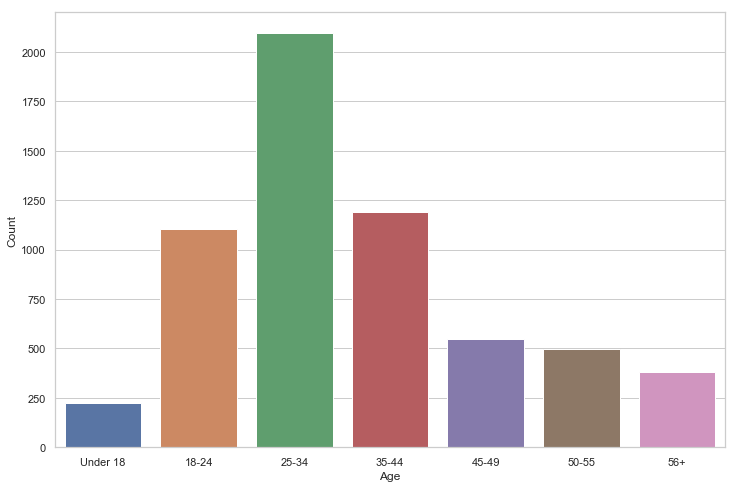

In [225]:
age_distribution = users[['Age', 'Occupation']].groupby('Age', as_index=False).count().rename(columns={'Occupation': 'Count'})
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Age', y='Count', data=age_distribution)
for col, text, i in zip(ax.patches, list(age_distribution['Count']), range(25)):
    barplot.annotate(format(text, '.2f'), (0,0))
ax.set_xticklabels(['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+'])
# We can see from the data that 25-34 is the most active age group
# barplot = sns.barplot(x='Rating', y='Movie Name', data=top25, order=top25['Movie Name'], color='Turquoise')


## Get the top 25 user rated movies

In [213]:
userRatings = master_data[['MovieID', 'Rating']].groupby('MovieID').mean().sort_values(by='Rating', ascending=False).merge(movies, how='inner', left_on='MovieID', right_on='MovieID')[['MovieID', 'Movie Name', 'Rating']]
userRatings = userRatings.merge(master_data[['MovieID', 'UserID']].groupby('MovieID').count().rename(columns={'UserID' : 'Count'}), how='inner', left_on='MovieID', right_on='MovieID').reset_index(drop=True)

# data contains movies with very low rating count. Eg. Rating Avg. of movie X is 5.00, but it has been rated only by 1 user.
# We need to set a threshold to find movies which have been rated by a certain number of people and then find the top ones.
# We'll be using the 50 %ile mark to set this threshold
rating_count_threshold = int(userRatings['Count'].quantile(0.5))
valid_user_ratings = userRatings.loc[userRatings['Count'] >= rating_count_threshold].reset_index(drop=True).copy()
top25 = valid_user_ratings.head(n=25)
top25.head()

,MovieID,Movie Name,Rating,Count
0,2019,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510,628
1,318,"Shawshank Redemption, The (1994)",4.554558,2227
2,858,"Godfather, The (1972)",4.524966,2223
3,745,"Close Shave, A (1995)",4.520548,657
4,50,"Usual Suspects, The (1995)",4.517106,1783


## Plot the top 25 user rated 

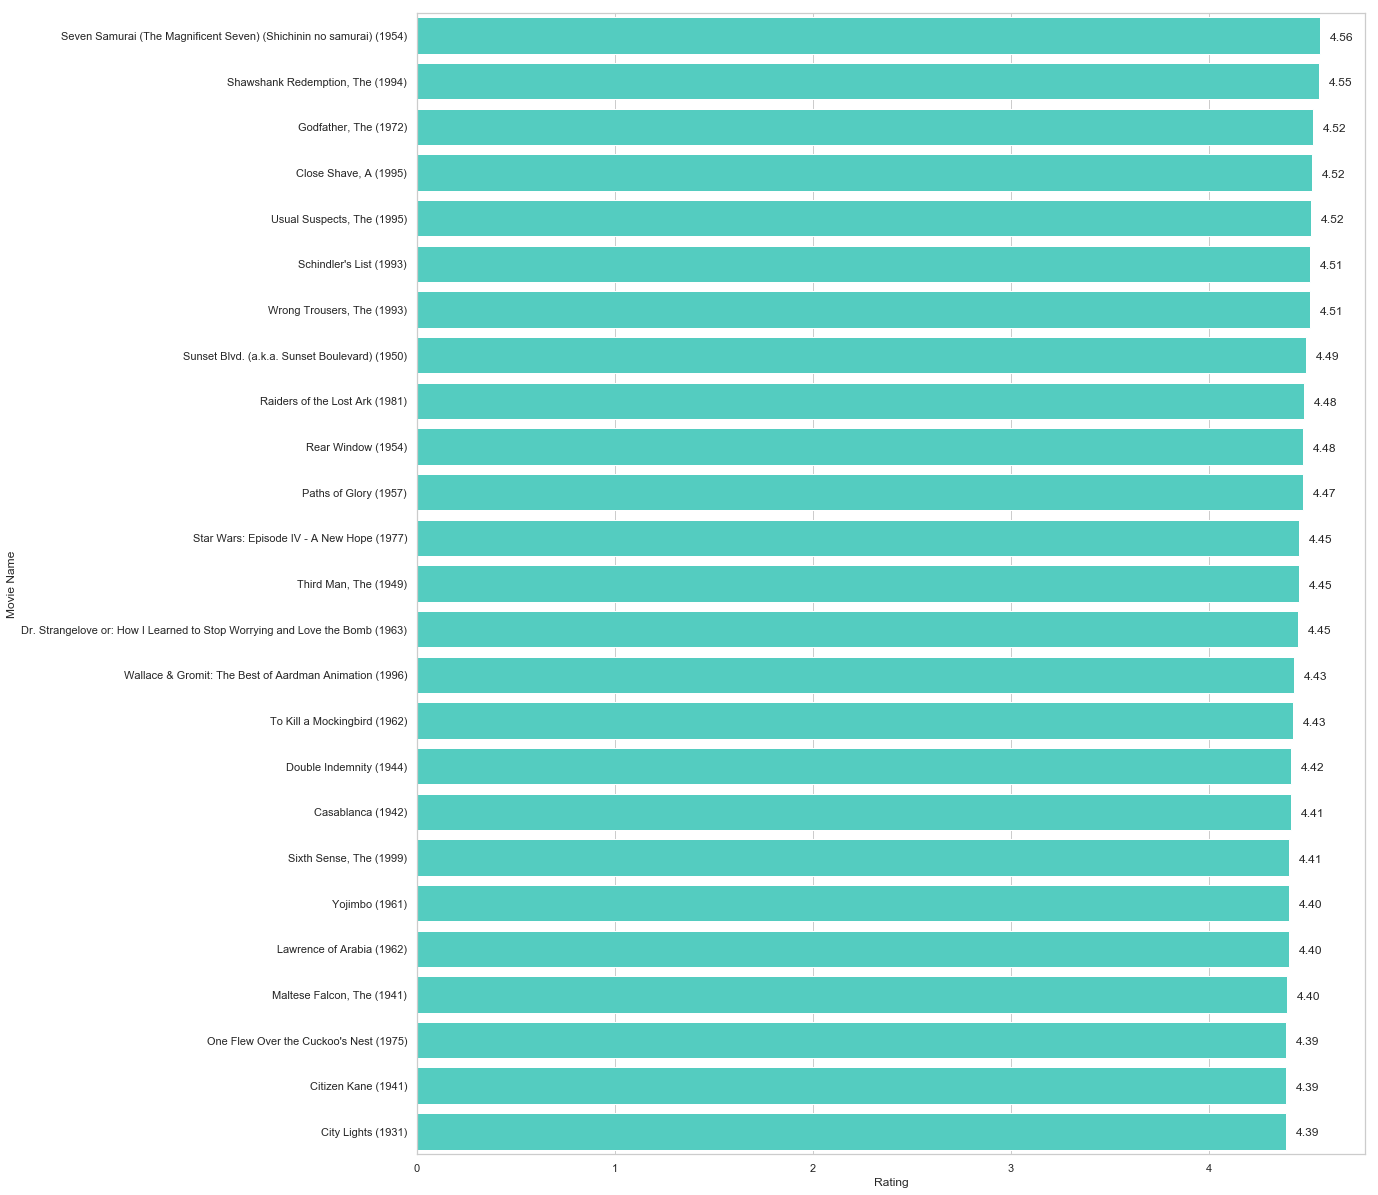

In [214]:
plt.figure(figsize=(17,21))
sns.set(style='whitegrid')
barplot = sns.barplot(x='Rating', y='Movie Name', data=top25, order=top25['Movie Name'], color='Turquoise')
for col, text, i in zip(barplot.patches, list(top25['Rating']), range(25)):
    barplot.annotate(format(text, '.2f'), (col.get_width() + 0.05, i * (col.get_height() + 0.2) + 0.1))

## Rating of movie 'Toy Story'

,MovieID,Movie Name,Rating,Count
202,1,Toy Story (1995),4.146846,2077


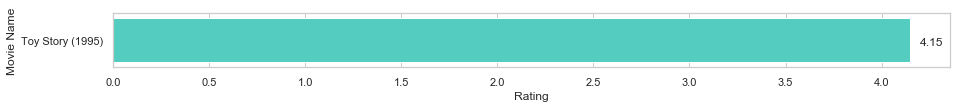

In [196]:
toyStoryRating = userRatings.loc[userRatings['Movie Name'] == 'Toy Story (1995)']

plt.figure(figsize=(15,1))
sns.set(style='whitegrid')
barplot = sns.barplot(x='Rating', y='Movie Name', data=toyStoryRating, color='Turquoise')
for col, text, i in zip(barplot.patches, list(toyStoryRating['Rating']), range(25)):
    barplot.annotate(format(text, '.2f'), (col.get_width() + 0.05, i * (col.get_height() + 0.2) + 0.1))

toyStoryRating

## Movies rated by user 2696

In [218]:
movies_rated_by_2696 = master_data.loc[master_data['UserID'] == 2696].copy()
movies_rated_by_2696.head()

,MovieID,Movie Name,UserID,Age,Gender,Occupation,Rating
24345,1270,Back to the Future (1985),2696,25,M,7,2
29848,1097,E.T. the Extra-Terrestrial (1982),2696,25,M,7,3
244232,1617,L.A. Confidential (1997),2696,25,M,7,4
250014,800,Lone Star (1996),2696,25,M,7,5
273633,3386,JFK (1991),2696,25,M,7,1


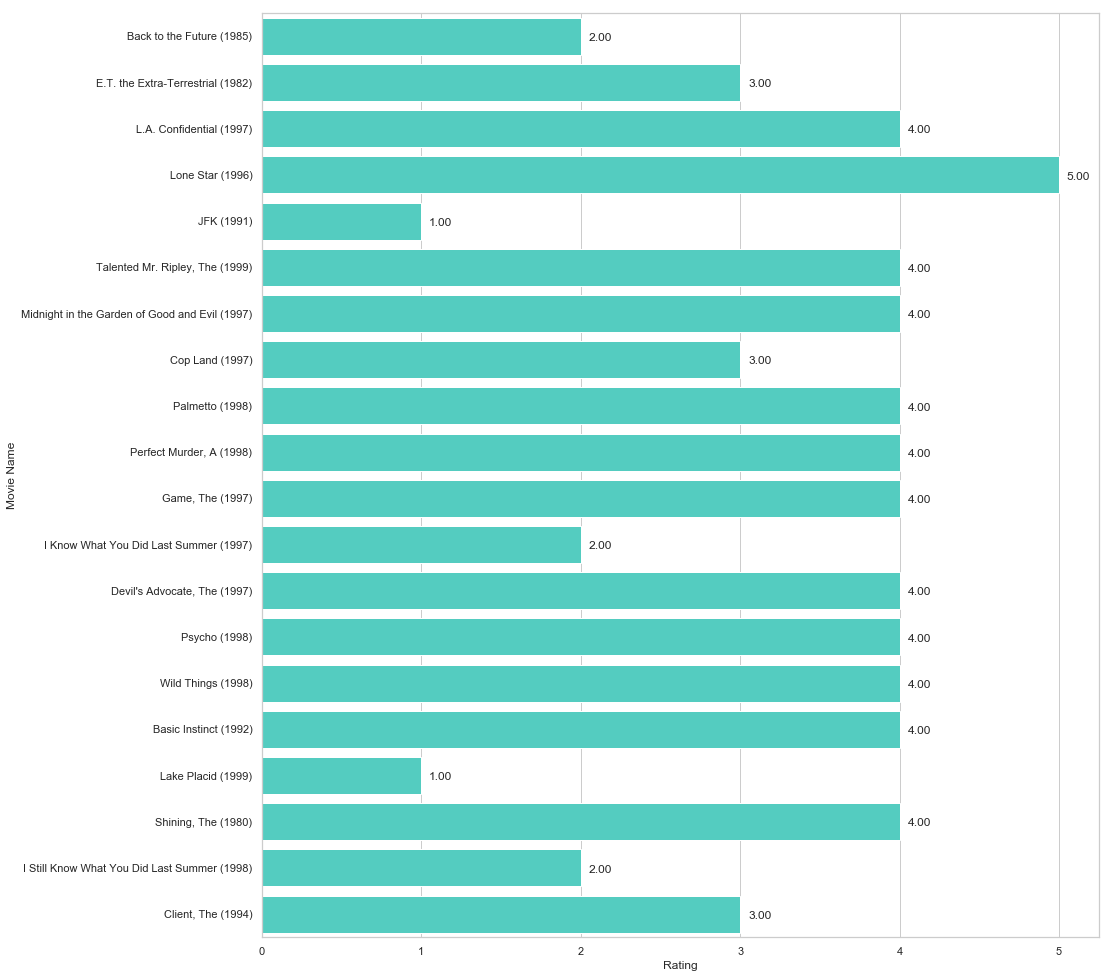

In [219]:
movies_rated_by_2696

plt.figure(figsize=(15,17))
sns.set(style='whitegrid')
barplot = sns.barplot(x='Rating', y='Movie Name', data=movies_rated_by_2696, color='Turquoise')
for col, text, i in zip(barplot.patches, list(movies_rated_by_2696['Rating']), range(25)):
    barplot.annotate(format(text, '.2f'), (col.get_width() + 0.05, i * (col.get_height() + 0.2) + 0.1))


In [227]:
ratings.corr()

,UserID,MovieID,Rating,Timestamp
UserID,1.000000,-0.017739,0.012303,-0.490383
MovieID,-0.017739,1.000000,-0.064042,0.041632
Rating,0.012303,-0.064042,1.000000,-0.026770
Timestamp,-0.490383,0.041632,-0.026770,1.000000
